In [16]:
import pandas as pd
import re

In [17]:
"""
Test parameters

model layer sizes: (64, 32, 32, 2)
groupdro_eta: 0.1
lr=0.001
weight_decay=0.005

batch_size = 40
proportional = True
epochs = 40
N = 120

"""

'\nTest parameters\n\nmodel layer sizes: (64, 32, 32, 2)\ngroupdro_eta: 0.1\nlr=0.001\nweight_decay=0.005\n\nbatch_size = 40\nproportional = True\nepochs = 40\nN = 120\n\n'

In [18]:
results = pd.read_csv("../results").iloc[:, 1:].transpose()
results.columns = ["ERM", "GDRO"]

In [19]:
results

,ERM,GDRO
0,"(0.8458646616541353, array([0.83571429, 0.8571...","(0.793233082706767, array([0.81428571, 0.78571..."
1,"(0.8270676691729323, array([0.82857143, 0.7857...","(0.793233082706767, array([0.80714286, 0.78571..."
2,"(0.8082706766917294, array([0.82142857, 0.7857...","(0.8120300751879699, array([0.77857143, 0.7857..."
3,"(0.849624060150376, array([0.85714286, 0.78571...","(0.8120300751879699, array([0.79285714, 0.7857..."
4,"(0.8383458646616542, array([0.87857143, 0.7142...","(0.8345864661654135, array([0.80714286, 0.8571..."
...,...,...
115,"(0.8571428571428571, array([0.85 , 0.7857...","(0.8421052631578947, array([0.84285714, 0.8571..."
116,"(0.8120300751879699, array([0.82142857, 0.7857...","(0.8007518796992481, array([0.82142857, 0.7142..."
117,"(0.8082706766917294, array([0.84285714, 0.5 ...","(0.8646616541353384, array([0.81428571, 0.7857..."
118,"(0.8308270676691729, array([0.87857143, 0.8571...","(0.8082706766917294, array([0.77142857, 0.8571..."


In [20]:
split = [[[float(s) for s in re.sub("\(|\[|[a-z]| |\]|\)", "", v).split(",")] for v in row] for row in results.values]
split[0][0][0]

0.8458646616541353

In [21]:
data_clean = [pd.DataFrame([[val[group] for val in row] for row in split], columns=["ERM","GDRO"]) for group in range(5)]

<AxesSubplot:title={'center':'Overall Accuracy'}>

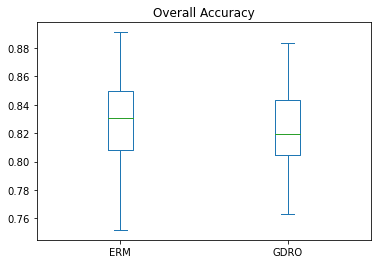

In [22]:
data_clean[0].plot(kind="box", title="Overall Accuracy")

<AxesSubplot:title={'center':'0benign'}>

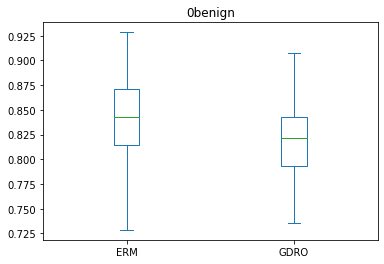

In [23]:
data_clean[1].plot(kind="box", title="0benign")

<AxesSubplot:title={'center':'1benign'}>

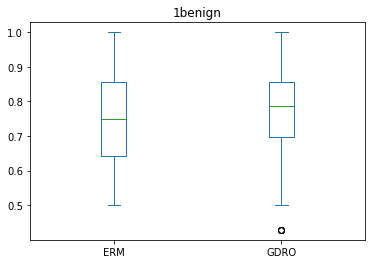

In [24]:
data_clean[2].plot(kind="box", title="1benign")

<AxesSubplot:title={'center':'0malignant'}>

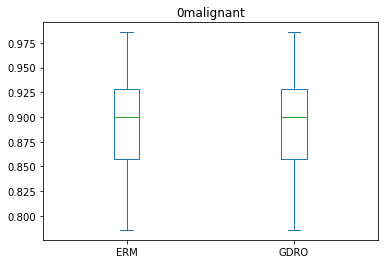

In [25]:
data_clean[3].plot(kind="box", title="0malignant")

<AxesSubplot:title={'center':'1malignant'}>

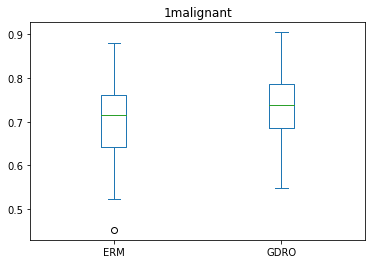

In [26]:
data_clean[4].plot(kind="box", title="1malignant")

In [28]:
from scipy.stats import ttest_ind
import statistics

group_names = ["Overall", "unmarked_benign", "marked_benign", "marked_malignant", "unmarked_malignant"]
for i in range(5):
    print(group_names[i])
    print(f"Mean ERM accuracy: {statistics.mean(data_clean[i]['ERM'])}")
    print(f"Mean GDRO accuracy: {statistics.mean(data_clean[i]['GDRO'])}")
    stat, p = ttest_ind(data_clean[i]["ERM"], data_clean[i]["GDRO"])
    if p < 0.05:
        print(f"{'ERM' if stat > 0 else 'GDRO'} higher accuracy (p = {p})")
    else:
        print(f"No statistically significant difference (p = {p})")
    print()
    

Overall
Mean ERM accuracy: 0.8278195488721805
Mean GDRO accuracy: 0.8227130325814537
No statistically significant difference (p = 0.14853036213299686)

unmarked_benign
Mean ERM accuracy: 0.8394642855
Mean GDRO accuracy: 0.8223214279166666
ERM higher accuracy (p = 0.0006786063906496075)

marked_benign
Mean ERM accuracy: 0.7440476191666666
Mean GDRO accuracy: 0.755952382
No statistically significant difference (p = 0.4606347113802094)

marked_malignant
Mean ERM accuracy: 0.897976191
Mean GDRO accuracy: 0.89261904775
No statistically significant difference (p = 0.3849503192710241)

unmarked_malignant
Mean ERM accuracy: 0.7000000003333333
Mean GDRO accuracy: 0.7297619049166667
GDRO higher accuracy (p = 0.0022939405147254085)



In [31]:
data_clean0

[          ERM      GDRO
 0    0.809211  0.812500
 1    0.822368  0.812500
 2    0.792763  0.812500
 3    0.792763  0.812500
 4    0.786184  0.809211
 ..        ...       ...
 115  0.812500  0.825658
 116  0.812500  0.786184
 117  0.809211  0.851974
 118  0.812500  0.786184
 119  0.805921  0.835526
 
 [120 rows x 2 columns],
           ERM      GDRO
 0    0.843750  0.864583
 1    0.833333  0.916667
 2    0.833333  0.770833
 3    0.968750  0.843750
 4    0.833333  0.760417
 ..        ...       ...
 115  0.895833  0.843750
 116  0.906250  0.791667
 117  0.916667  0.947917
 118  0.802083  0.864583
 119  0.864583  0.885417
 
 [120 rows x 2 columns],
           ERM      GDRO
 0    0.895833  0.864583
 1    0.854167  0.885417
 2    0.854167  0.864583
 3    0.875000  0.916667
 4    0.927083  0.854167
 ..        ...       ...
 115  0.875000  0.864583
 116  0.937500  0.791667
 117  0.875000  0.802083
 118  0.875000  0.781250
 119  0.906250  0.916667
 
 [120 rows x 2 columns],
          ERM     G